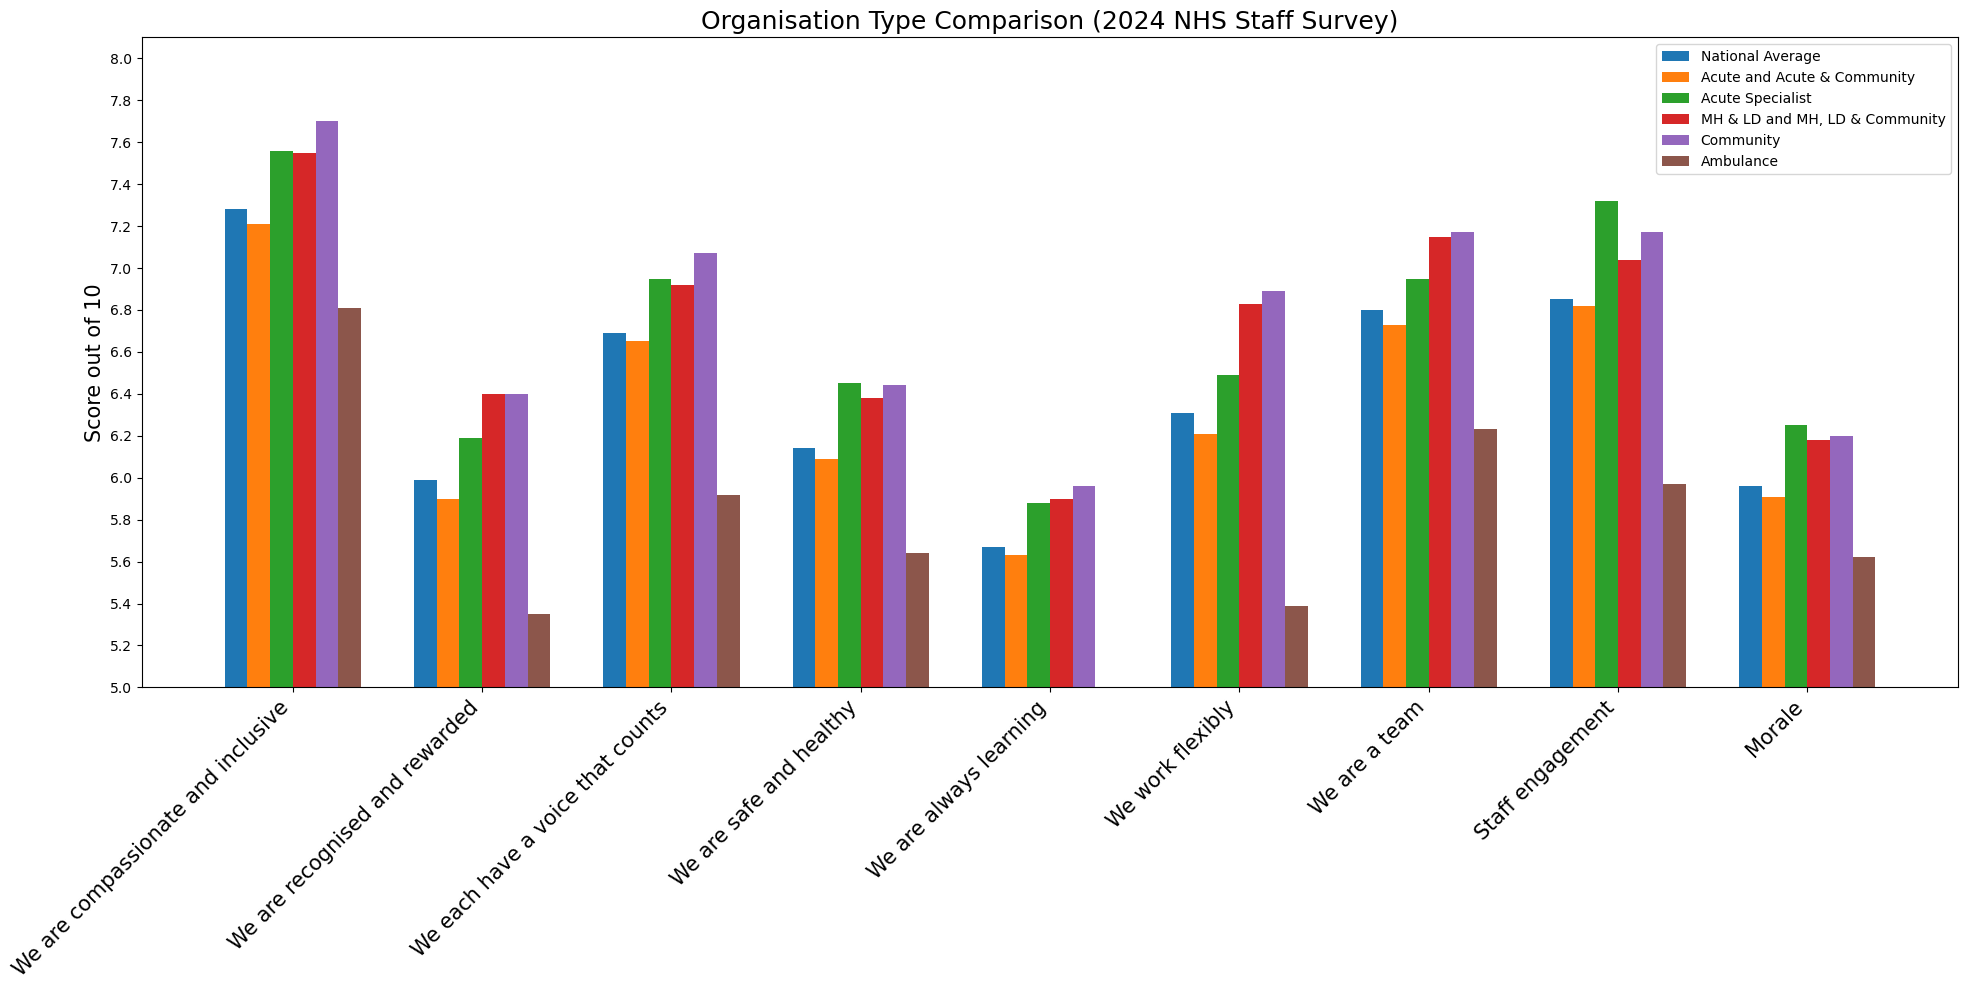

In [91]:
import pandas as pd
import numpy as np

# Import the pyplot object from matplotlib
from matplotlib import pyplot as plt
organisation_type_score_2024_df = pd.read_excel(r'C:\Users\renji\Downloads\summary in 2024 about NHS.xlsx',header=1)
organisation_type_score_2024_df.head()
organisation_type_score_2024_df.columns = organisation_type_score_2024_df.columns.str.strip()
organisation_type_score_2024_df.columns = organisation_type_score_2024_df.columns.str.replace(r'\s+', ' ', regex=True)
organisation_type_score_2024_df.set_index('Organisation type', inplace=True)
my_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
org_types = df.index.tolist()
indicators = df.columns.tolist()
fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 0.12
x = np.arange(len(indicators))
for i, org in enumerate(org_types):
    ax.bar(x + i * bar_width, df.loc[org], width=bar_width, label=org, color=my_colors[i])
ax.set_xticks(x + bar_width * (len(org_types) - 1) / 2)
ax.set_xticklabels(indicators, rotation=45, ha='right',fontsize=15)
ax.set_yticks(np.arange(5, 8.1, 0.2))
ax.set_ylabel("Score out of 10",fontsize=15)
ax.set_ylim(5, 8.1)
ax.set_title("Organisation Type Comparison (2024 NHS Staff Survey)",fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

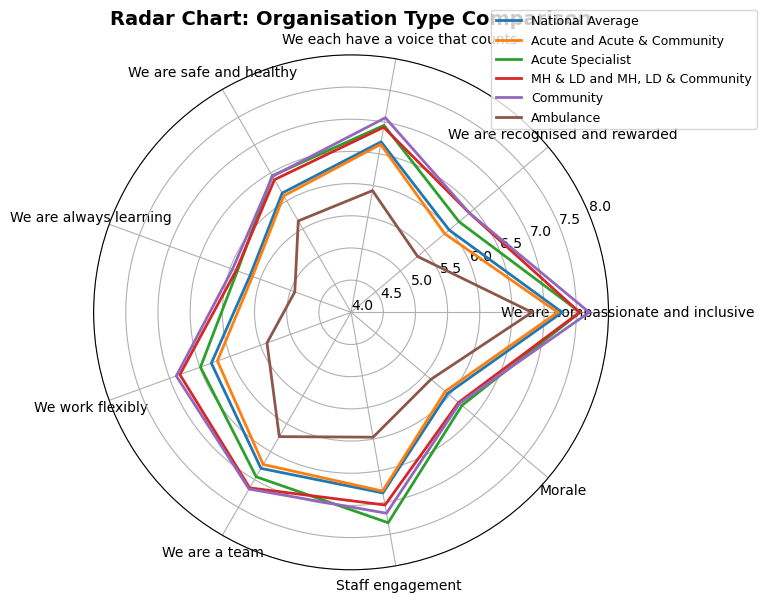

In [125]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
for i, (org, row) in enumerate(df.iterrows()):
    values = row.astype(float).values.tolist()
    values += values[:1] 
    ax.plot(angles, values, label=org, linewidth=2, color=colors[i % len(colors)])
#ax.fill(angles, values, alpha=0.5, color=colors[i % len(colors)])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_ylim(4, 8)  
ax.set_yticks(np.arange(4, 8.1, 0.5))
ax.set_title("Radar Chart: Organisation Type Comparison", fontsize=14, weight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
plt.tight_layout()
plt.show()

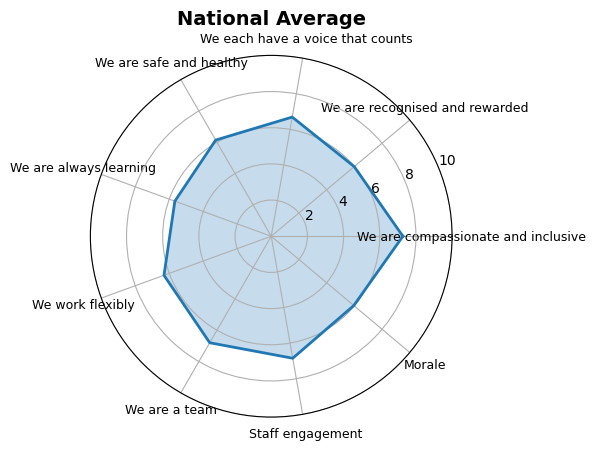

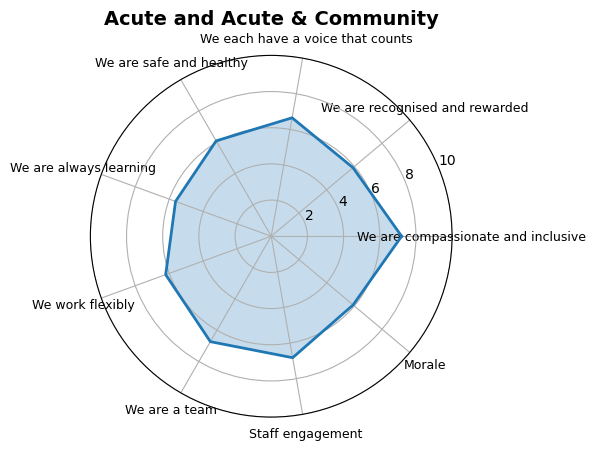

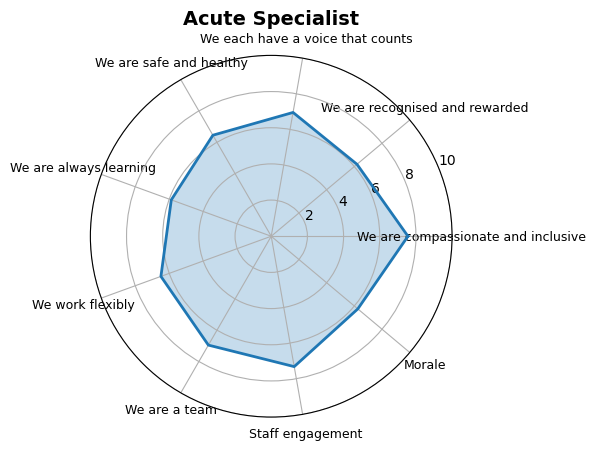

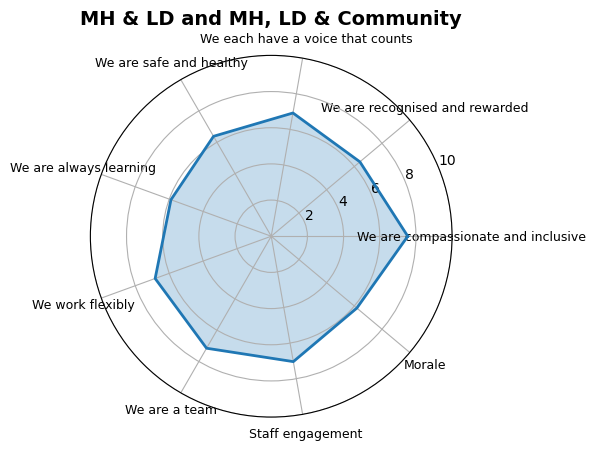

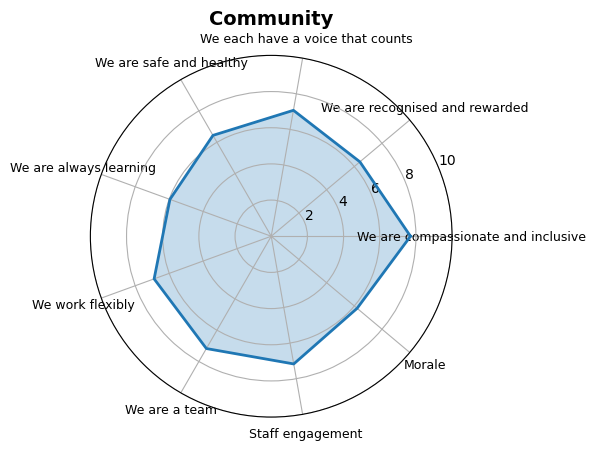

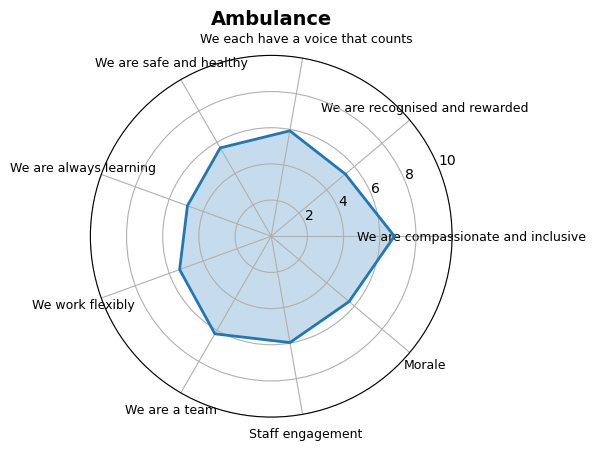

In [111]:
labels = organisation_type_score_2024_df.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] 
for org in organisation_type_score_2024_df.index:
    values = organisation_type_score_2024_df.loc[org].tolist()
    values += values[:1]
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=org)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_ylim(0, 10)
    ax.set_title(f"{org}", fontsize=14, weight='bold')
    plt.tight_layout()
    plt.show()

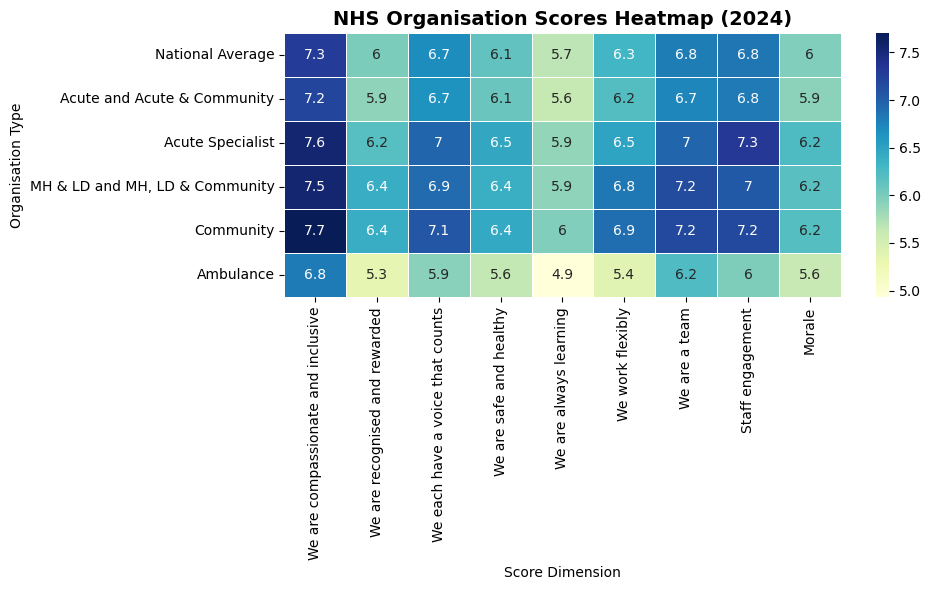

In [127]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(organisation_type_score_2024_df, cmap='YlGnBu', annot=True, linewidths=0.5)
plt.title("NHS Organisation Scores Heatmap (2024)", fontsize=14, weight='bold')
plt.xlabel("Score Dimension")
plt.ylabel("Organisation Type")
plt.tight_layout()
plt.show()


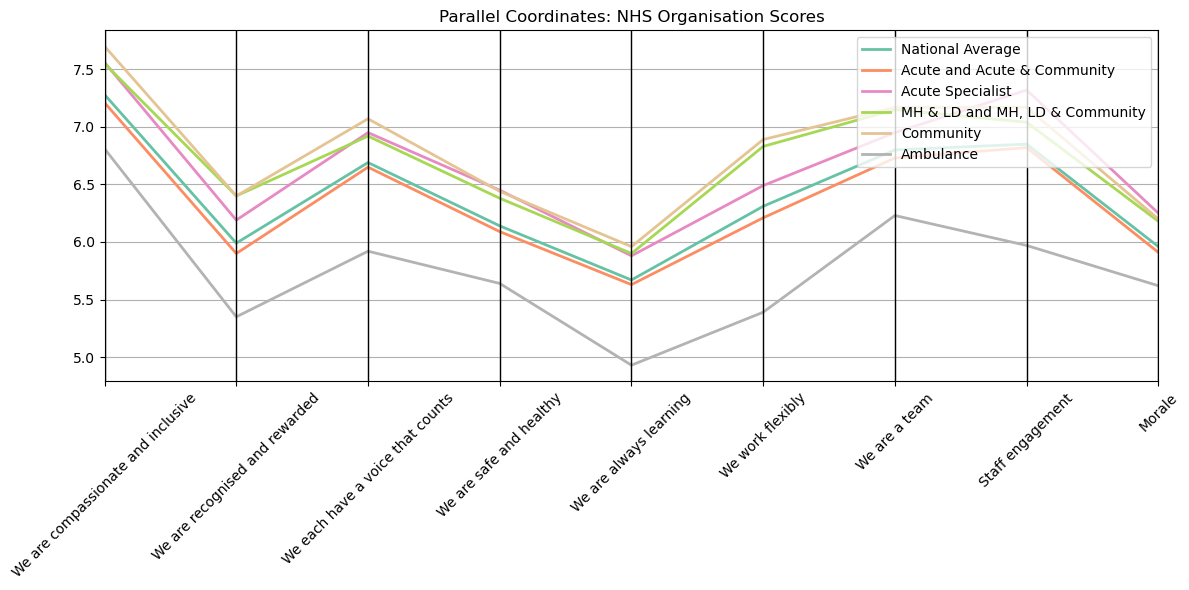

In [133]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12, 6))
organisation_type_score_2024_df_reset = organisation_type_score_2024_df.reset_index()
parallel_coordinates(organisation_type_score_2024_df_reset, 'Organisation type', colormap='Set2', linewidth=2)
plt.title("Parallel Coordinates: NHS Organisation Scores")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

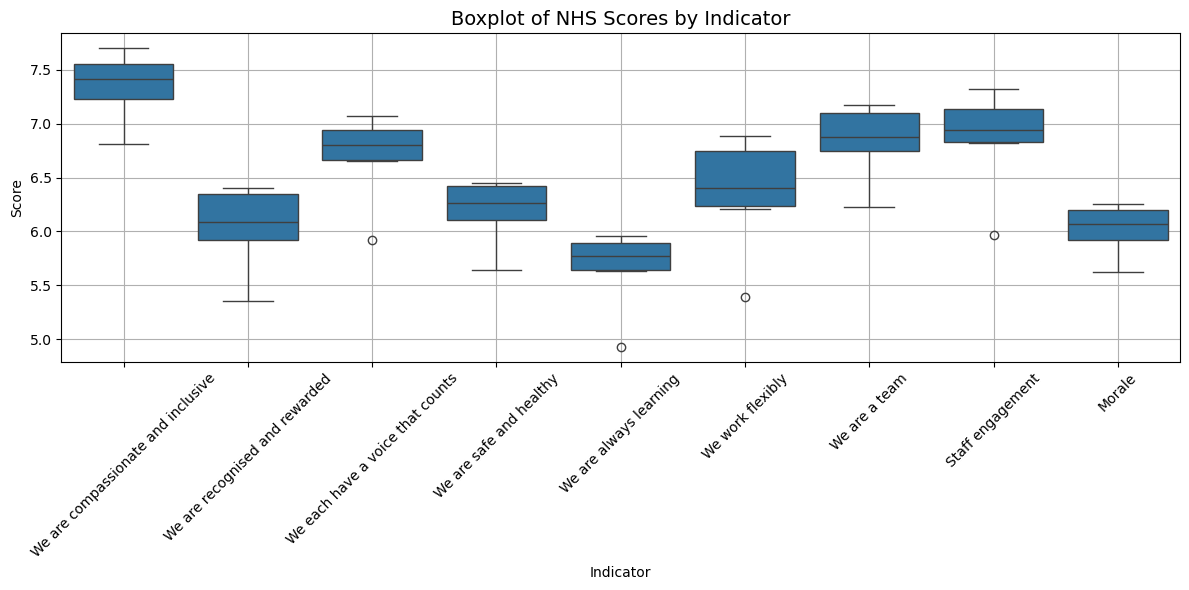

In [135]:
df_long = organisation_type_score_2024_df.reset_index().melt(id_vars='Organisation type',
                                var_name='Indicator',
                                value_name='Score')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Indicator', y='Score', data=df_long)
plt.title("Boxplot of NHS Scores by Indicator", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()